In [1]:
import unicodecsv

def open_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        list_from_csv = list(reader)
    return list_from_csv

In [2]:
enrollments_filename = 'resources/enrollments.csv'
daily_engagement_filename = 'resources/daily_engagement.csv'
project_submissions_filename = 'resources/project_submissions.csv'

enrollments = open_csv(enrollments_filename)
daily_engagement = open_csv(daily_engagement_filename)
project_submissions = open_csv(project_submissions_filename)

print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Problems in the Data

In [6]:
for row in daily_engagement:
    row["account_key"] = row["acct"]
    del(row["acct"])

daily_engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
def unique_students_in_data(data):
    unique_rows = set()
    for row in data:
        unique_rows.add(row["account_key"])
    return unique_rows

In [8]:
def unique_students_in_data_info(data):
    unique_rows = unique_students_in_data(data)
    return "# of Account Keys in data: {:,} out of {:,} ({:.2%})".format(len(unique_rows),
                                                                       len(data),
                                                                        1.*len(unique_rows)/len(data))

In [9]:
unique_enrollments = unique_students_in_data(enrollments)
unique_daily_engagements = unique_students_in_data(daily_engagement)
unique_project_submissions = unique_students_in_data(project_submissions)

print("### enrollments")
print(unique_students_in_data_info(enrollments))
print("### daily_engagement")
print(unique_students_in_data_info(daily_engagement))
print("### project_submissions")
print(unique_students_in_data_info(project_submissions))

### enrollments
# of Account Keys in data: 1,302 out of 1,640 (79.39%)
### daily_engagement
# of Account Keys in data: 1,237 out of 136,240 (0.91%)
### project_submissions
# of Account Keys in data: 743 out of 3,642 (20.40%)


## Missing Engagement Records

In [10]:
enrollments_without_engagement = []

for row in enrollments:
    if not row["account_key"] in unique_daily_engagements:
        enrollments_without_engagement.append(row)

print("### enrollments_without_engagement")
for i in range(5):
    print("#{}: {}".format(i, enrollments_without_engagement[i]))

### enrollments_without_engagement
#0: {u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
#1: {u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 13, 0, 0), u'account_key': u'871', u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), u'days_to_cancel': 0}
#2: {u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 15, 0, 0), u'account_key': u'1218', u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), u'days_to_cancel': 0}
#3: {u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 4, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), u'days_to_cancel': 0}
#4: {u'status': u'canceled', u'is_udacity': False, u'is_c

## Checking for More Problem Records

In [11]:
enrollments_without_engagement_and_not_canceled_the_same_day = []

for row in enrollments_without_engagement:
    if row["days_to_cancel"] or row["days_to_cancel"] == None:
        enrollments_without_engagement_and_not_canceled_the_same_day.append(row)

print("### enrollments_without_engagement_and_not_canceled_the_same_day")
for i, row in enumerate(enrollments_without_engagement_and_not_canceled_the_same_day):
    print("#{}: {}".format(i, row))
print("Number of problematic rows left: {}".format(len(enrollments_without_engagement_and_not_canceled_the_same_day)))

### enrollments_without_engagement_and_not_canceled_the_same_day
#0: {u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
#1: {u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
#2: {u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
Number of problematic rows left: 3


## Tracking Down the Remaining Problems

In [12]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [13]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [14]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [15]:
paid_students = {}

for row in non_udacity_enrollments:
    if row["days_to_cancel"] == None or row["days_to_cancel"] > 7:
        account_key = row["account_key"]
        join_date = row["join_date"]
        if account_key not in paid_students or join_date > paid_students[account_key]:
            paid_students[account_key] = join_date

print(len(paid_students))

995


## Getting Data from First Week

In [16]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [17]:
paid_engagement_in_first_week = []

for row in non_udacity_engagement:
    if row["account_key"] in paid_students and within_one_week(paid_students[row["account_key"]], row["utc_date"]):
        paid_engagement_in_first_week.append(row)

print("paid_engagement_in_first_week: {:,} out of {:,} ({:.2%})".format(len(paid_engagement_in_first_week),
                                                                       len(non_udacity_engagement),
                                                                        1.*len(paid_engagement_in_first_week)/len(non_udacity_engagement)))

paid_engagement_in_first_week: 6,919 out of 135,656 (5.10%)


In [18]:
paid_submissions = []
for row in non_udacity_submissions:
    if row["account_key"] in paid_students:
        paid_submissions.append(row)

## Exploring Student Engagement

In [19]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [20]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

In [21]:
import numpy as np

def summarize_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

summarize_data(total_minutes_by_account.values())

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [22]:
from collections import OrderedDict

ordered_total_minutes_by_account = OrderedDict(sorted(total_minutes_by_account.items(), key=lambda t: t[1]))
key_with_highest_engagement = ordered_total_minutes_by_account.keys()[-1]
print("Highest engagement: {} minutes for account #{}".format(ordered_total_minutes_by_account[key_with_highest_engagement], key_with_highest_engagement))

for engagement_row in engagement_by_account[key_with_highest_engagement]:
    print(engagement_row)

# It looks like some students re-start their course later, and thus have previous engagement records dating from before the latest enrollment.

Highest engagement: 3564.7332645 minutes for account #163
{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetim

## Lessons Completed in First Week

In [23]:
total_lessons_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

summarize_data(total_lessons_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [24]:
for account, engagement_records in engagement_by_account.items():
    for engagement_record in engagement_records:
        if engagement_record["num_courses_visited"] > 0:
            engagement_record["has_visited"] = 1
        else:
            engagement_record["has_visited"] = 0

total_visits_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
summarize_data(total_visits_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [25]:
subway_project_lesson_keys = ['746169184', '3176718735']

paid_submissions[0]
# assigned_rating_values = set()
# for row in paid_submissions:
#     assigned_rating_values.add(row["assigned_rating"])
# assigned_rating_values = {u'', u'DISTINCTION', u'INCOMPLETE', u'PASSED', u'UNGRADED'}

passing_ratings = [u'DISTINCTION', u'PASSED']
passing_submissions = set()
non_passing_submissions_before_review = set()
non_passing_submissions = set()

for row in paid_submissions:
    if row['lesson_key'] in subway_project_lesson_keys:
        if row['assigned_rating'] in passing_ratings:
            passing_submissions.add(row['account_key'])
        else:
            non_passing_submissions_before_review.add(row['account_key'])
for value in non_passing_submissions_before_review:
    if not value in passing_submissions:
        non_passing_submissions.add(value)

print("{} passing submissions".format(len(passing_submissions)))
print("{} non passing submissions".format(len(non_passing_submissions)))

passing_engagement = []
non_passing_engagement = []

for row in paid_engagement_in_first_week:
    if row['account_key'] in passing_submissions:
        passing_engagement.append(row)
    else:
        non_passing_engagement.append(row)

print("{} passing engagements".format(len(passing_engagement)))
print("{} non passing engagements".format(len(non_passing_engagement)))

647 passing submissions
33 non passing submissions
4527 passing engagements
2392 non passing engagements


## Comparing the Two Student Groups

In [26]:
passing_engagement_by_account = defaultdict(list)
for engagement_record in passing_engagement:
    account_key = engagement_record['account_key']
    passing_engagement_by_account[account_key].append(engagement_record)
non_passing_engagement_by_account = defaultdict(list)
for engagement_record in non_passing_engagement:
    account_key = engagement_record['account_key']
    non_passing_engagement_by_account[account_key].append(engagement_record)
    
total_lessons_by_passing_account = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
total_lessons_by_non_passing_account = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')

print("total_lessons_by_passing_account")
summarize_data(total_lessons_by_passing_account.values())
print("total_lessons_by_non_passing_account")
summarize_data(total_lessons_by_non_passing_account.values())

total_lessons_by_passing_account
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
total_lessons_by_non_passing_account
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


In [27]:
total_minutes_by_passing_account = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
total_minutes_by_non_passing_account = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')

print("total_minutes_by_passing_account")
summarize_data(total_minutes_by_passing_account.values())
print("total_minutes_by_non_passing_account")
summarize_data(total_minutes_by_non_passing_account.values())

total_minutes_by_passing_account
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
total_minutes_by_non_passing_account
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


In [28]:
# some_key = passing_engagement_by_account.keys()[-1]
# print some_key
# print passing_engagement_by_account[some_key]
total_visits_by_passing_account = sum_grouped_items(passing_engagement_by_account, 'has_visited')
total_visits_by_non_passing_account = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')

print("total_visits_by_passing_account")
summarize_data(total_visits_by_passing_account.values())
print("total_visits_by_non_passing_account")
summarize_data(total_visits_by_non_passing_account.values())

total_visits_by_passing_account
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
total_visits_by_non_passing_account
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Making Histograms

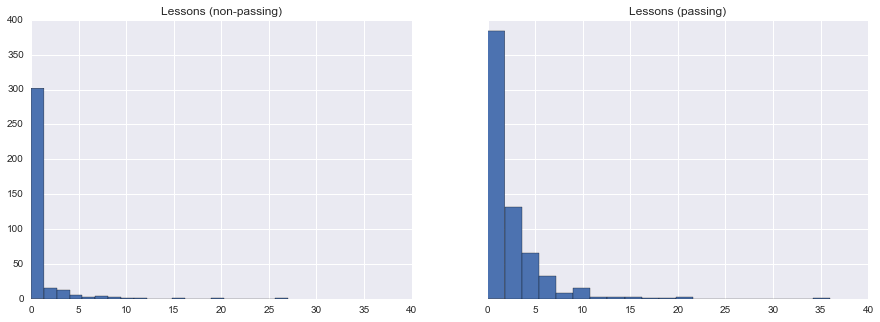

In [32]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# fig, ((a,b),(c,d)) = plt.subplots(2,2)
fig, (a,b) = plt.subplots(1,2,sharex=True,sharey=True, figsize=(15,5))

a.hist(total_lessons_by_non_passing_account.values(), bins=20)
a.set_title("Lessons (non-passing)")
b.hist(total_lessons_by_passing_account.values(), bins=20)
b.set_title("Lessons (passing)")

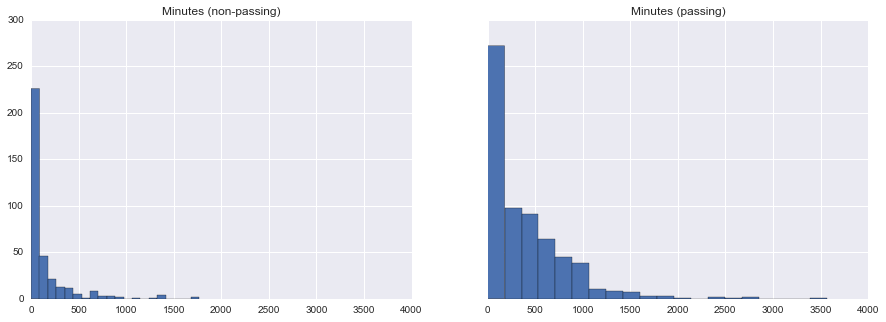

In [33]:
fig, (c,d) = plt.subplots(1,2,sharex=True,sharey=True, figsize=(15,5))

c.hist(total_minutes_by_non_passing_account.values(), bins=20)
c.set_title("Minutes (non-passing)")
d.hist(total_minutes_by_passing_account.values(), bins=20)
d.set_title("Minutes (passing)")

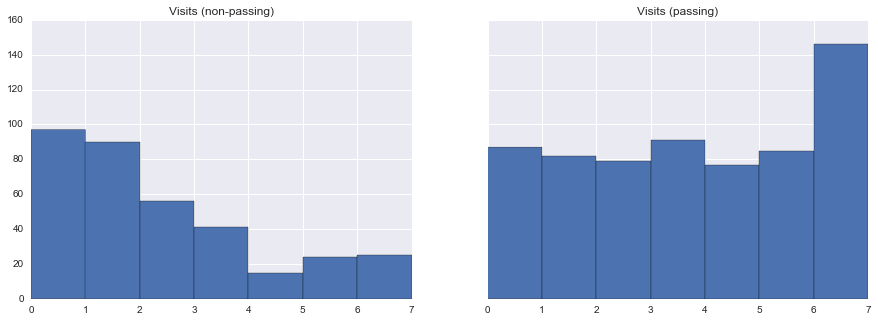

In [31]:
fig, (e,f) = plt.subplots(1,2,sharex=True,sharey=True, figsize=(15,5))

e.hist(total_visits_by_non_passing_account.values(), bins=7)
e.set_title("Visits (non-passing)")
f.hist(total_visits_by_passing_account.values(), bins=7)
f.set_title("Visits (passing)")